In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [4]:
num_words = 1000
maxlen = 200

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.imdb.load_data(num_words = num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [9]:
X_train =keras.preprocessing.sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen = maxlen)

In [14]:
model = keras.Sequential([
    layers.Embedding(num_words , 128 ,input_length = maxlen),
    layers.LSTM(128),
    layers.Dense(1,activation = 'sigmoid')
])

In [16]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    X_train,y_train,
    epochs = 5,
    validation_split = 0.2,
    batch_size = 128,
    verbose = 1
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 191ms/step - accuracy: 0.7424 - loss: 0.5112 - val_accuracy: 0.8178 - val_loss: 0.4093
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 186ms/step - accuracy: 0.8183 - loss: 0.4078 - val_accuracy: 0.8096 - val_loss: 0.4304
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 187ms/step - accuracy: 0.8454 - loss: 0.3593 - val_accuracy: 0.8226 - val_loss: 0.3992
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 187ms/step - accuracy: 0.8598 - loss: 0.3357 - val_accuracy: 0.8420 - val_loss: 0.3509
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 187ms/step - accuracy: 0.8702 - loss: 0.3090 - val_accuracy: 0.8374 - val_loss: 0.3574


In [19]:
plt.figure(figsize=(10,4))


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

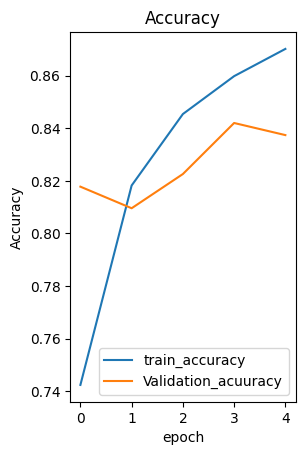

In [22]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label = "train_accuracy")
plt.plot(history.history['val_accuracy'],label = "Validation_acuuracy")
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

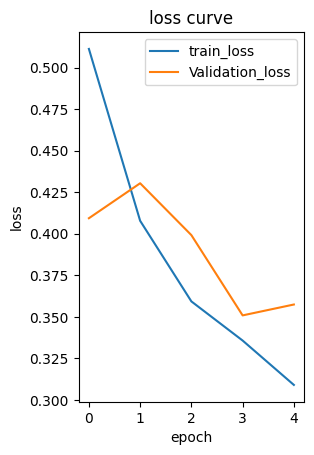

In [24]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label = "train_loss")
plt.plot(history.history['val_loss'],label = "Validation_loss")
plt.title("loss curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [26]:
test_loss,test_acc = model.evaluate(X_test,y_test,verbose = 1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8492 - loss: 0.3444


In [27]:
print("Tets_Accuray",test_acc)
print("Test_Loss",test_loss)

Tets_Accuray 0.8492000102996826
Test_Loss 0.3443838655948639


In [43]:
pred = (model.predict(X_test[:5])>0.5).astype(int)
for i in range(5):
    print("Review",i,"|","Actual",y_test[i], "|" "predicted",int(pred[i]))
    print("-------------------------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Review 0 | Actual 0 |predicted 1
-------------------------------
Review 1 | Actual 1 |predicted 1
-------------------------------
Review 2 | Actual 1 |predicted 0
-------------------------------
Review 3 | Actual 0 |predicted 0
-------------------------------
Review 4 | Actual 1 |predicted 1
-------------------------------


C:\Users\prati\AppData\Local\Temp\ipykernel_16244\67558752.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Review",i,"|","Actual",y_test[i], "|" "predicted",int(pred[i]))
